<a href="https://colab.research.google.com/github/PashaIanko/Kaggle.Restaurant-Revenue-Prediction/blob/main/3.model_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [1]:
import pandas as pd
from google.colab import drive
import pickle
import os

In [2]:
# PEP 8
%%capture
!pip install pycodestyle
!pip install --index-url https://test.pypi.org/simple/ nbpep8

from nbpep8.nbpep8 import pep8

# Import module files

In [18]:
%%capture
git_download_path = \
'https://raw.githubusercontent.com/PashaIanko/Kaggle.Restaurant-Revenue-Prediction/main/'

files = [
    'sklearn_utils.py',
    'sklearn_transformers.py',
    'model.py',
    'path_manager.py'
]

def download_files(dict_):
    for file, url in dict_.items():
        !wget -O {file} {url} {file}
    
download_files(
    {
        file: git_download_path + file for file in files
    }
)

In [21]:
import importlib
import sklearn_transformers
import sklearn_utils 
import path_manager
import model

def reload_all(list_):
    for module in list_:
        importlib.reload(module)

reload_all(
    [
        path_manager,
        sklearn_utils,
        sklearn_transformers,
        model
    ]
)

from model import Model
from path_manager import PathManager
from sklearn_utils import dict_subset

# Setup paths

In [5]:
drive.mount('/content/gdrive')
gdrive_path = '/content/gdrive/MyDrive/'

COMPETITION_PATH = gdrive_path + 'ML/Competitions/5.RestaurantRevenue/'
PREPROC_TRIAL = 2
MODELS_TRIAL = 2

pep8(_ih)

Mounted at /content/gdrive



In [6]:
manager = PathManager(
    competition_path=COMPETITION_PATH,
    preprocessing_trial=PREPROC_TRIAL,
    models_trial=MODELS_TRIAL
)

pep8(_ih)

# Download models

In [7]:
models = manager.load_models()

In [8]:
models

{'RF_rand': RandomForestRegressor(max_depth=6, n_estimators=600, random_state=42),
 'ElasticNet_rand': ElasticNet(alpha=0.1, l1_ratio=0.1, random_state=42),
 'SVM reg_rand': SVR(C=0.7000000000000001, gamma='auto'),
 'RF_grid_search': RandomForestRegressor(max_depth=5, n_estimators=700, random_state=42),
 'ElasticNet_grid_search': ElasticNet(alpha=0.1, l1_ratio=0.2, normalize=False, random_state=42),
 'SVM reg_grid_search': SVR()}

# Download data

In [9]:
df_test = pd.read_csv(
    os.path.join(
        manager.data_trial_path,
        'test_processed.csv'
    ),
    index_col=[0]
)

# subsample from train.csv for testing
df_test_sample = pd.read_csv(
    os.path.join(
        manager.data_trial_path,
        'test_sample_processed.csv'
    ),
    index_col=[0]
)

df_trainval = pd.read_csv(
    os.path.join(
        manager.data_trial_path,
        'trainval_sample_processed.csv'
    ),
    index_col=[0]
)

X_train_val = df_trainval.values[:, :-1]
Y_train_val = df_trainval.values[:, -1]

X_test_sample = df_test_sample.values[:, :-1]
Y_test_sample = df_test_sample.values[:, -1]

# Model mistake analysis

- From feature importance analysis, we see that the most important features are **opening year** and **city population**

# Feature importance

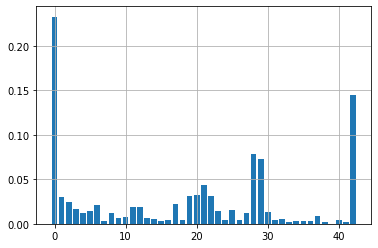

In [12]:
import numpy as np
import matplotlib.pyplot as plt

model = models['RF_rand']
plt.bar(
    np.arange(len(model.feature_importances_)),
    model.feature_importances_
)
plt.grid()

pep8(_ih)

# Visualize trainval predictions

In [22]:
models.keys()

dict_keys(['RF_rand', 'ElasticNet_rand', 'SVM reg_rand', 'RF_grid_search', 'ElasticNet_grid_search', 'SVM reg_grid_search'])

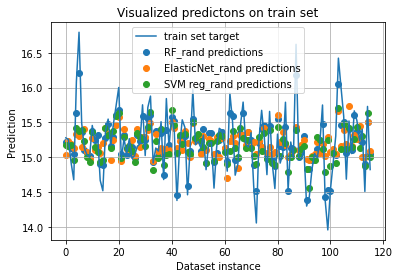

In [23]:
from sklearn_utils import visualize_regression_predictions

visualize_regression_predictions(
    dict_subset(models, ['RF_rand', 'ElasticNet_rand', 'SVM reg_rand']),
    X_=X_train_val,
    Y_=Y_train_val,
    dataset_type_='train set'
)

# Selecting final model

- I select the best model, based on average cross validation score among fine-tuned models. At the same time, i track that this model does not overfit the trainset, and average cross-validation performance is comparable with train metrics

In [26]:
from sklearn_utils import print_model_cv_scores


_ = print_model_cv_scores(
    # dict_subset(models, ['RF_rand', 'SVM reg_rand', 'ElasticNet_rand']),
    models,
    X_=X_train_val,
    Y_=Y_train_val,
    cv_=7,
    scoring_='neg_mean_squared_error'
)

Model: ElasticNet_rand, mean: -0.22238430217090185, std: 0.09773385412604917
Model: ElasticNet_grid_search, mean: -0.21654850319301097, std: 0.09675081768097432
Model: SVM reg_rand, mean: -0.2053489009225662, std: 0.08625756347037801
Model: SVM reg_grid_search, mean: -0.20352256537285138, std: 0.0854572304409114
Model: RF_rand, mean: -0.18961521767840836, std: 0.07051544673326783
Model: RF_grid_search, mean: -0.18947912363632674, std: 0.07193736621744515


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:155: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:155: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:155: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave 

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:155: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:155: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:155: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave 

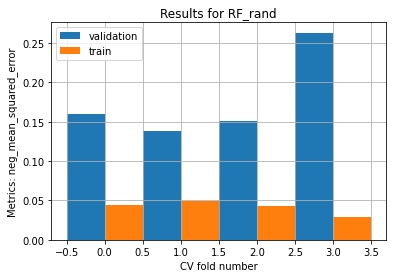

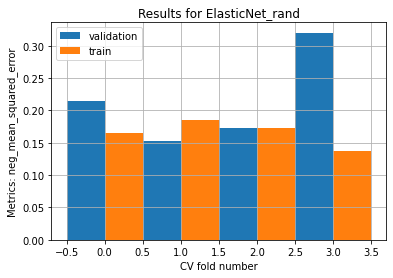

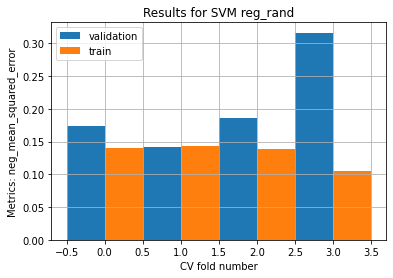

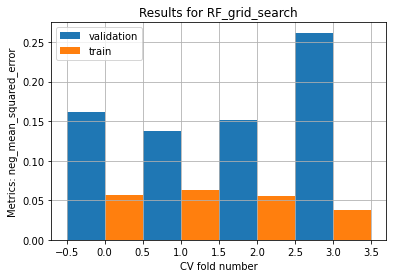

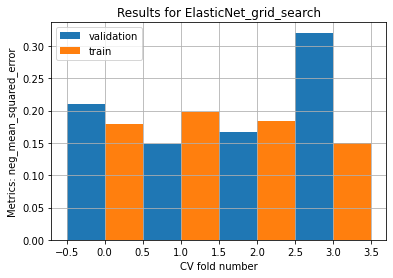

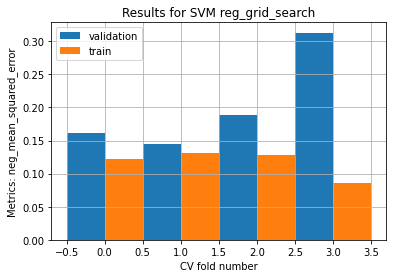

In [25]:
from sklearn_utils import plot_cv_results


_ = plot_cv_results(
    models,
    X_=X_train_val,
    Y_=Y_train_val,
    cv_=4,
    scoring_='neg_mean_squared_error',
    to_put_minus_=True
)

- My decision:
    - Random forest better captured the structure of the data (visualizations)
    - However, random forest overfits. Both version with n_estimators = 800 and 200 give approximately same average cross validation result. Hence, I use other model (e.g. Elastic regression)

In [28]:
models

{'RF_rand': RandomForestRegressor(max_depth=6, n_estimators=600, random_state=42),
 'ElasticNet_rand': ElasticNet(alpha=0.1, l1_ratio=0.1, random_state=42),
 'SVM reg_rand': SVR(C=0.7000000000000001, gamma='auto'),
 'RF_grid_search': RandomForestRegressor(max_depth=5, n_estimators=700, random_state=42),
 'ElasticNet_grid_search': ElasticNet(alpha=0.1, l1_ratio=0.2, normalize=False, random_state=42),
 'SVM reg_grid_search': SVR()}

In [29]:
final_models = {
    'SVM_final': models['SVM reg_rand'],
    'ElasticNet_final': models['ElasticNet_rand']
}

In [30]:
manager.save_models(
    final_models
)